In [2]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
#pd.get_option("display.max_rows")
#pd.reset_option("display.max_rows")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [3]:
os.chdir('C:\\Users\\rafal\\Desktop\\Licencjat\\data')
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [4]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
data1=pd.get_dummies(data1,columns=['foot'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,1,0,0,0,0,0,1,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,1,0,0,0,0,0,1,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,1,0,0,0,0,0,1,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,1,0,0,0,0,0,1,0,1,0
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,0,0,0,0,1,0,0,0,0,1
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,0,0,0,0,1,0,0,0,1,0


In [5]:
#MIDFIELDERS
dataMID = data1[data1['position2'].str[:10]=='Midfielder']
dataMID1 = data1[data1['position2'].str[:8]=='midfield']
dataMID=pd.DataFrame.append(dataMID,dataMID1)

In [6]:
#dataMID['age']=dataMID['age']*dataMID['age']
#dataMID_cor = dataMID.corr()
#show=pd.Series(dataMID_cor['value'])
#pd.set_option('display.max_rows', None)
#show.sort_values(ascending=False)

In [7]:
def ln(x):
    return np.log(x)

#Creating a linear regression

trainMID, testMID = train_test_split(dataMID, train_size=0.8)
modelMID1=smf.ols('ln(value)~wins_gk+clean_sheets+Pts+W+GDiff+clean_sheets_pct+CL+xGDiff+GF+xG+passes_ground+passes_completed_medium+passes_medium+games+games_starts+minutes_90s+minutes+games_gk+games_starts_gk+minutes_90s_gk+minutes_gk+passes_throws_gk+passes_other_body+passes_completed+passes_received+passes_live+pass_targets+carries+touches_live_ball+passes_pct_long+touches_def_pen_area+passes_completed_short+passes_gk+passes_pressure+passes_pct+def_actions_outside_pen_area_gk+passes_total_distance+psxg_net_gk+touches_def_3rd+passes_short+passes+touches+ball_recoveries+through_balls+dribble_tackles_pct+psxg_net_per90_gk+passes_pct_launched_gk+save_pct+passes_low+xa_net+passes_progressive_distance+WinCL+carry_distance+gca_passes_dead+errors+passes_switches+passes_completed_long+crosses_gk+passes_intercepted+crosses_stopped_gk+dribbles_completed_pct+passes_left_foot+carry_progressive_distance+isPremierLeague+MP+avg_distance_def_actions_gk+saves+draws_gk+assists+goal_kicks+gca+foot_left+isLaLiga+passes_right_foot+shots_on_target_against+passes_pct_short+aerials_won_pct+passes_dead+assists_per90+gca_per90+passes_completed_launched_gk+passes_long+sca_passes_dead+def_actions_outside_pen_area_per90_gk+passes_pct_medium+crosses_stopped_pct_gk+passes_oob+own_goals_against_gk+gca_passes_live+pens_conceded+shots_on_target_pct+throw_ins+psxg_gk+pens_missed_gk+goals_assists_pens_per90+passes_received_pct+height+pens_allowed+goals_assists_per90+passes_launched_gk+npxg_net+pens_att_gk+cards_red+sca+xg_net+sca_passes_live+passes_high+fouled+free_kick_goals_against_gk+cards_yellow+corner_kicks_in+xa+passes_offsides+pens_saved+dribbles_completed+dribble_tackles+assisted_shots+players_dribbled_past+npxg_per_shot+xa_per90+passes_into_penalty_area+pressure_regain_pct+tackles_def_3rd+passes_free_kicks+miscontrols+dribbles+dribbles_vs+passes_head+isSerieA+clearances+corner_kick_goals_against_gk+dribbled_past+corner_kicks+shots_on_target_per90+tackles+goals_against_gk+pressures_def_3rd+tackles_won+dispossessed+tackles_mid_3rd+fouls+shots_total_per90+progressive_passes+offsides+npxg_xa_per90+xg_xa_per90+goals_pens_per90+passes_blocked+touches_mid_3rd+aerials_won+shots_on_target+sca_dribbles+gca_shots+pens_att+pens_made+pens_won+nutmegs+goals_per90+crosses+pressures+blocked_shots+pressure_regains+interceptions+goals_per_shot+shots_total+pressures_mid_3rd+shots_free_kicks+touches_att_pen_area+goals+sca_fouled+pressures_att_3rd+aerials_lost+touches_att_3rd+tackles_att_3rd+xg+goals_per_shot_on_target+own_goals+npxg+sca_shots+npxg_per90+xg_per90+blocks+blocked_passes+sca_per90+crosses_into_penalty_area+passes_into_final_third+D+psnpxg_per_shot_on_target_against+goal_kick_length_avg+foot_right+isBundesliga+isLigue1+passes_length_avg_gk+pct_goal_kicks_launched+losses_gk+pct_passes_launched_gk+age+goals_against_per90_gk+xGA+GA+L+LgRk+gca_dribbles+gca_fouled+gca_og_for+corner_kicks_out+corner_kicks_straight+foot_both+cards_yellow_red+blocked_shots_saves',data=dataMID)    

modelMID=smf.ols('ln(value)~age+goals+CL+passes_completed_short+passes_into_final_third'
                   '+Pts+xG+xGA'
                   '+xg_xa_per90'
                   '+carry_distance+tackles_won+'
                   '+isPremierLeague+isLigue1',data=dataMID)
resultsMID=modelMID.fit()
resultsMID_params=resultsMID.params
resultsMID1=modelMID1.fit()
resultsMID1_params=resultsMID1.params
#Creating a robust regression
modelMIDrobust=sm.RLM(modelMID.endog,modelMID.exog,data=trainMID).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalMID1 = sm.regression.linear_model.OLSResults(modelMID, 
                                              modelMIDrobust.params, 
                                              modelMID.normalized_cov_params)
finalMID1.summary()
#ball recoveries, assists, height, passes ground, gca
#print('do not bother about it printing summary like for OLS - this is a robust regression as you can see from the code')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(value)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          4.45e-323
Time:                        15:38:21   Log-Likelihood:                -1398.5
No. Observations:                1490   AIC:                             2825.
Df Residuals:                    1476   BIC:                             2899.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  16.7560      0.195     86.077      0.000      16.374      17.138
age                        -0.0905      0.005    -19.961      0.000      -0.099      -0.082
goals                       0.0540      0.010      5.486      0.000       0.035       0.073
CL                          0.1760      0.062      2.859      0.004       0.055       0.297
passes_completed_short      0.0009      0.000      4.645      0.000       0.001       0.001
passes_into_final_third     0.0013      0.001      2.027      0.043    4.07e-05       0.002
Pts                         0.0134      0.002      6.317      0.000       0.009       0.018
xG                          0.0069      0.002      2.821      0.005       0.002       0.012
xGA                        -0.0142      0.002     -6.258      0.000      -0.019      -0.010
xg_xa_per90                 0.7539      0.163      4.629      0.000       0.434       1.073
carry_distance           3.973e-05   1.18e-05      3.365      0.001    1.66e-05    6.29e-05
tackles_won                 0.0049      0.001      3.489      0.000       0.002       0.008
isPremierLeague             0.5399      0.040     13.556      0.000       0.462       0.618
isLigue1                   -0.3468      0.047     -7.356      0.000      -0.439      -0.254
==============================================================================
Omnibus:                        3.630   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.628
Skew:                           0.084   Prob(JB):                        0.163
Kurtosis:                       3.173   Cond. No.                     6.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Creating a robust regression
#modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=trainGK).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
#finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              #modelGKrobust.params, 
                                              #modelGK.normalized_cov_params)
#print(finalGK1.summary())

In [9]:
#Creating a robust ridge regression
#modelMIDrobustridge = sm.OLS(modelMID1.endog, modelMID1.exog).fit_regularized(alpha=0.1, L1_wt=1,start_params=resultsMID1_params)
#modelMIDrobustridge = sm.WLS(modelMI1D.endog, modelMID1.exog, weights=modelMIDrobust.weights).fit_regularized(L1_wt=1, alpha=0.01,start_params=resultsMID_params)

#finalMID2 = sm.regression.linear_model.OLSResults(modelMID1, 
                                            #  modelMIDrobustridge.params, 
                                             # modelMID1.normalized_cov_params)
#finalMID2.summary()

In [10]:
#testing
#Breusch-Pagan
bptestMID=sm.stats.diagnostic.het_breuschpagan(finalMID1.resid, finalMID1.model.exog)
bptestMID

(50.80058003363976,
 2.171752487758276e-06,
 4.007658440006714,
 1.7176492505153234e-06)

In [11]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["features"] = modelMID.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalMID1.model.exog, i) for i in range(finalMID1.model.exog.shape[1])]
vif

,features,VIF Factor
0,Intercept,146.181934
1,age,1.098737
2,goals,2.053384
3,CL,2.455416
4,passes_completed_short,6.457447
5,passes_into_final_third,4.802665
6,Pts,5.308040
7,xG,3.851456
8,xGA,2.030618
9,xg_xa_per90,2.010508


In [12]:
#autocorrelation
#sm.stats.stattools.durbin_watson(resultsMID.resid)

In [13]:
#Chowtest
trainMID1=dataMID[dataMID['Season_201819#']==0]
trainMID2=dataMID[dataMID['Season_201819#']==1]
JMID = len(resultsMID.params)-1 #number of coefficients
N1MID = trainMID1.shape[0]
N2MID = trainMID2.shape[0]
RSSdMID=resultsMID.ssr
resultsMIDridge1=smf.ols('ln(value)~age+goals+CL+passes_completed_short+passes_into_final_third'
                   '+Pts+xG+xGA'
                   '+xg_xa_per90'
                   '+carry_distance+tackles_won+'
                   '+isPremierLeague+isLigue1',data=trainMID1).fit()
RSSbMID=resultsMIDridge1.ssr
kMID = len(resultsMIDridge1.params)-1
resultsMIDridge2=smf.ols('ln(value)~age+goals+CL+passes_completed_short+passes_into_final_third'
                   '+Pts+xG+xGA'
                   '+xg_xa_per90'
                   '+carry_distance+tackles_won+'
                   '+isPremierLeague+isLigue1',data=trainMID2).fit()
RSSnbMID = resultsMIDridge2.ssr
ChowMID=((RSSdMID-(RSSbMID+RSSnbMID))/JMID)/((RSSbMID+RSSnbMID)/(N1MID+N2MID-2*kMID))
pMID=sp.stats.f.cdf(ChowMID, JMID, N1MID+N2MID-2*kMID)
print(ChowMID,pMID,JMID)

2.2963398583489614 0.9947344379098917 13


In [14]:
#endogeneity
#from statsmodels.sandbox.regression.gmm import IV2SLS
#resultsMIDridgeendog=IV2SLS(resultsMID.model.endog, resultsMID.model.exog, instrument=dataMID['minutes']).fit()
#resultsMIDridgeendog.summary()
#resultsMIDridgeendog.spec_hausman()

In [15]:
#correlation matrix
#sm.regression.linear_model.RegressionResults.cov_params(resultsMID)
#sns.heatmap(sm.regression.linear_model.RegressionResults.cov_params(resultsMID),annot=False,fmt='g')
#dataMID_cor = dataMID.corr()

In [16]:
predictionsMID=finalMID1.predict(dataMID)
dataMID['predsOLS']=np.exp(predictionsMID)
#MIDpredtrain=resultsMID.predict(trainMID)
#MIDpredtest=resultsMID.predict(testMID)
#rmsetrainMID=sm.tools.eval_measures.rmse(trainMID['value'],MIDpredtrain)
#rmsetestMID=sm.tools.eval_measures.rmse(testMID['value'],MIDpredtest)
#print(rmsetrainMID,rmsetestMID)

In [17]:
#evaluating predictions
#predictionsMID1=finalMID2.predict(dataMID)
#MIDpredtrain1=finalMID2.predict(trainMID)
#MIDpredtest1=finalMID2.predict(testMID)
#rmsetrainMID=sm.tools.eval_measures.rmse(trainMID['value'],MIDpredtrain1)
#rmsetestMID=sm.tools.eval_measures.rmse(testMID['value'],MIDpredtest1)
#print(rmsetrainMID,rmsetestMID)

In [18]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        #self.results_ = self.model_.fit_regularized(L1_wt=1, alpha=0.1,start_params=resultsMID_params)
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
linearcval=cross_val_score(SMWrapper(sm.RLM), modelMID.exog, modelMID.endog, scoring='neg_root_mean_squared_error')
pd.DataFrame(pd.Series(np.transpose(linearcval)))
#robustcval=cross_val_score(SMWrapper(sm.RLM), modelMID.exog, modelMID.endog, scoring='neg_mean_absolute_error')
#pd.DataFrame(pd.concat([pd.Series(np.transpose(linearcval)),pd.Series(np.transpose(robustcval))],axis=1))

,0
0,-0.649323
1,-0.658617
2,-0.639718
3,-0.571998
4,-0.690232


In [19]:
#pd.concat([pd.Series(np.exp(predictionsMID)).reset_index(),pd.Series(np.exp(modelMID.endog))],axis=1)

In [20]:
#sns.scatterplot(data=resultsMID.resid)

In [21]:
#from statsmodels.graphics.regressionplots import plot_leverage_resid2
#fig, ax = plt.subplots(figsize=(8,6))
#fig = plot_leverage_resid2(resultsMID, ax = ax)

In [22]:
data=dataMID[dataMID['Season_201920#']==1]
#data1=data.sort_values('clean_sheetsm',ascending=False)[0:10]['value']
#data2=data.sort_values('psnpxg_per_shot_on_target_against',ascending=True)[0:10]['value']
#data3=data.sort_values('passes_pct_launched_gk',ascending=False)[0:10]['value']
data=data[['player','value','goals','xg_xa_per90','passes_completed_short','passes_into_final_third','carry_distance','tackles_won','minutes']]
#data1=data.sort_values('value',ascending=False)
#p.DataFrame(data.mean()).transpose()
#data

,player,value,goals,xg_xa_per90,passes_completed_short,passes_into_final_third,carry_distance,tackles_won,minutes
2,VÄ‚Â­ctor Camarasa,4000000.0,0.0,0.13,187.0,36.0,2401.0,14.0,1293.0
5,Ljubomir Fejsa,2000000.0,0.0,0.00,98.0,18.0,685.0,17.0,786.0
20,TomÄ‚Ë‡s Pina Isla,1500000.0,1.0,0.09,187.0,37.0,1605.0,21.0,1344.0
21,Pere Pons,3500000.0,1.0,0.10,143.0,9.0,1770.0,20.0,1088.0
28,Wakaso,2000000.0,0.0,0.03,102.0,42.0,2603.0,28.0,1283.0
...,...,...,...,...,...,...,...,...,...
2618,Xaver Schlager,12000000.0,1.0,0.19,234.0,58.0,4035.0,44.0,1719.0
2628,Leander Dendoncker,22000000.0,4.0,0.07,382.0,55.0,4350.0,40.0,2795.0
2630,Morgan Gibbs-White,7000000.0,0.0,0.12,27.0,5.0,459.0,1.0,129.0
2635,JoÄ‚Ĺ�o Moutinho,8000000.0,1.0,0.20,511.0,157.0,6151.0,54.0,3108.0


Text(0.85, 0.85, '0.23')

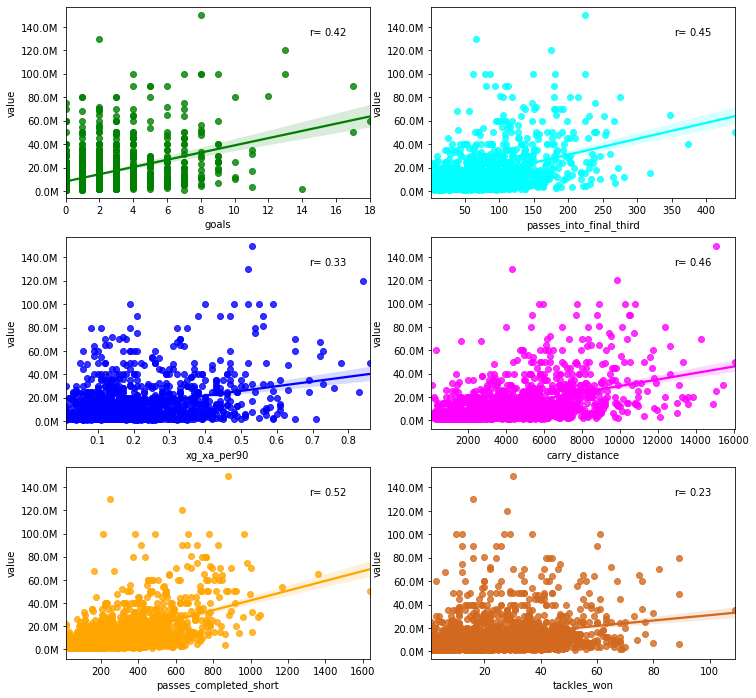

In [23]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = mpl.ticker.FuncFormatter(millions)


#dataMID=dataMID[['goals','xg_xa_per90','passes_completed_short','passes_into_final_third','carry_distance','tackles_won']

#dataMID=dataMID[dataMID['goals']>0]
dataMID=dataMID[dataMID['xg_xa_per90']>0]
dataMID=dataMID[dataMID['passes_completed_short']>0]
dataMID=dataMID[dataMID['passes_into_final_third']>0]
dataMID=dataMID[dataMID['carry_distance']>0]
dataMID=dataMID[dataMID['tackles_won']>0]
lecimy1=np.corrcoef(dataMID['value'],dataMID['goals'])
lecimy2=np.corrcoef(dataMID['value'],dataMID['xg_xa_per90'])
lecimy3=np.corrcoef(dataMID['value'],dataMID['passes_completed_short'])
lecimy4=np.corrcoef(dataMID['value'],dataMID['passes_into_final_third'])
lecimy5=np.corrcoef(dataMID['value'],dataMID['carry_distance'])
lecimy6=np.corrcoef(dataMID['value'],dataMID['tackles_won'])
lecimy1=lecimy1[0,1]
lecimy2=lecimy2[0,1]
lecimy3=lecimy3[0,1]
lecimy4=lecimy4[0,1]
lecimy5=lecimy5[0,1]
lecimy6=lecimy6[0,1]

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
sns.regplot(ax=ax[0,0],x=dataMID['goals'],y=dataMID['value'],data=dataMID,color='g')
sns.regplot(ax=ax[1,0],x=dataMID['xg_xa_per90'],y=dataMID['value'],data=dataMID,color='blue')
sns.regplot(ax=ax[2,0],x=dataMID['passes_completed_short'],y=dataMID['value'],data=dataMID,color='orange')
sns.regplot(ax=ax[0,1],x=dataMID['passes_into_final_third'],y=dataMID['value'],data=dataMID,color='cyan')
sns.regplot(ax=ax[1,1],x=dataMID['carry_distance'],y=dataMID['value'],data=dataMID,color='magenta')
sns.regplot(ax=ax[2,1],x=dataMID['tackles_won'],y=dataMID['value'],data=dataMID,color='chocolate')

ax[0,0].yaxis.set_major_formatter(formatter)
ax[0,0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[0,0].annotate("{:.2f}".format(lecimy1),xy=(0.85,0.85), xycoords="axes fraction")

ax[1,0].yaxis.set_major_formatter(formatter)
ax[1,0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[1,0].annotate("{:.2f}".format(lecimy2),xy=(0.85,0.85), xycoords="axes fraction")

ax[2,0].yaxis.set_major_formatter(formatter)
ax[2,0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[2,0].annotate("{:.2f}".format(lecimy3),xy=(0.85,0.85), xycoords="axes fraction")

ax[0,1].yaxis.set_major_formatter(formatter)
ax[0,1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[0,1].annotate("{:.2f}".format(lecimy4),xy=(0.85,0.85), xycoords="axes fraction")

ax[1,1].yaxis.set_major_formatter(formatter)
ax[1,1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[1,1].annotate("{:.2f}".format(lecimy5),xy=(0.85,0.85), xycoords="axes fraction")

ax[2,1].yaxis.set_major_formatter(formatter)
ax[2,1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[2,1].annotate("{:.2f}".format(lecimy6),xy=(0.85,0.85), xycoords="axes fraction")